In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
from utils import *

In [4]:
import html
import json

In [5]:
bs=32

In [6]:
path = Path('/home/cristian/projects/ulmfit-es')

In [7]:
import fastai
print(fastai.__version__)

1.0.50.post1


# Preparing the data

In [8]:
data = Path('/home/cristian/projects/ulmfit-es/language_model_wiki/LM')

In [9]:
data.ls()

[PosixPath('/home/cristian/projects/ulmfit-es/language_model_wiki/LM/train.csv'),
 PosixPath('/home/cristian/projects/ulmfit-es/language_model_wiki/LM/val.csv')]

In [10]:
df_train = pd.read_csv(data/'train.csv', header=None)

df_val = pd.read_csv(data/'val.csv', header=None)

In [11]:
# prepend column of ones 
def prepend_one_cols(df):
    df[1]=np.ones(len(df))
    cols = list(df)
    cols[1], cols[0] = cols[0], cols[1]
    return df.iloc[:,cols]

In [12]:
df_train = prepend_one_cols(df_train)

In [13]:
df_train.head()

,1,0
0,1.0,González es uno de los en que se encuentra div...
1,1.0,La Unidad de Análisis Financiero (UAF) es un s...
2,1.0,Mejicanos es un municipio del departamento de ...
3,1.0,Niceland fue un grupo musical islandés de heav...
4,1.0,El Lento Violento es un género creado por el D...


In [14]:
df_val = prepend_one_cols(df_val)

In [15]:
df_val.head()

,1,0
0,1.0,"La Bandera de Soriano, Uruguay, consta de cinc..."
1,1.0,La N-525 es una que va desde la localidad zamo...
2,1.0,"Willie Weeks (Salemburg, Carolina del Norte, E..."
3,1.0,Lara Jean Chorostecki es una actriz canadiense...
4,1.0,"Jennifer Stewart (Redondo Beach, California; 2..."


In [19]:
data_train = TextLMDataBunch.from_df(path, train_df=df_train, valid_df=df_val, bs=bs)

Trying hyperparams as found out in https://forums.fast.ai/t/training-transformerxl/40104/12

In [9]:
lr_recommended = 5e-4
pct_start_recommended = 2e-2
moms_recommended = (0.75,0.825)
wd_recommended = 1e-5
drop_recommended = 0.05

In [25]:
data_train.save('data.pkl')

In [10]:
data_train = load_data(path, 'data.pkl', bs=bs)

In [11]:
learn = language_model_learner(data_train, TransformerXL, drop_mult=drop_recommended, pretrained=False)

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


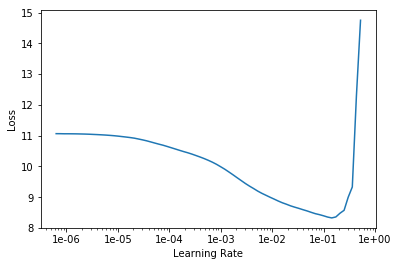

In [18]:
learn.recorder.plot()

In [21]:
lr=3e-3

In [ ]:
learn.fit_one_cycle(cyc_len=1,
                    max_lr=lr_recommended,
                    moms=moms_recommended,
                    wd=wd_recommended)

epoch,train_loss,valid_loss,accuracy,time


In [25]:
replay_train_metrics(learn.recorder)

epoch	train_loss	valid_loss	accuracy	time
1	3.731647	3.671940	 0.361246	 not recorded


In [26]:
learn.save('tXL_1_epoch_hyp2')

In [27]:
learn.lr_find()

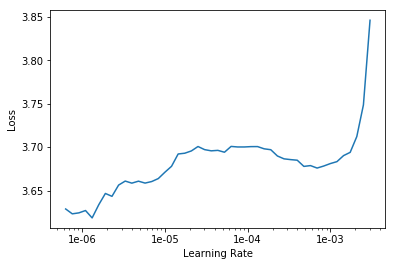

In [30]:
learn.recorder.plot(skip_end=25)

In [31]:
learn.fit_one_cycle(cyc_len=3,
                    max_lr=2e-4,
                    moms=moms_recommended,
                    wd=wd_recommended)

epoch,train_loss,valid_loss,accuracy,time
0,3.621506,3.649950,0.361377,2:50:20
1,3.447726,3.503697,0.378207,2:51:50
2,3.391684,3.436424,0.387567,2:50:14


In [29]:
learn = learn.load('tXL_4_epochs_hyp2')

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


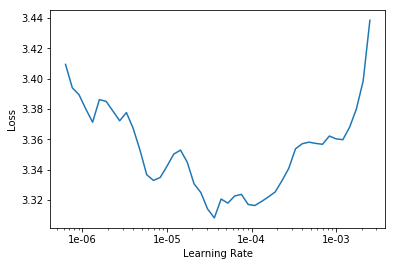

In [31]:
learn.recorder.plot(skip_end=25)

In [37]:
learn.fit_one_cycle(cyc_len=5,
                    max_lr=2e-5,
                    moms=moms_recommended,
                    wd=wd_recommended)

epoch,train_loss,valid_loss,accuracy,time
0,3.388387,3.437262,0.387587,2:50:56
1,3.443031,3.432530,0.388401,2:51:14
2,3.382738,3.427135,0.389516,2:51:18
3,3.332563,3.424114,0.390291,2:51:19
4,3.378320,3.423423,0.390366,2:51:23


In [39]:
learn.save('tXL_9_epochs_hyp2')

In [12]:
learn = learn.load('tXL_9_epochs_hyp2')

In [ ]:
learn.predict('cuando nosotros ', 100, temperature=0.75)

In [ ]:
learn.beam_search('cuando nosotros ', 100, temperature=0.15)

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


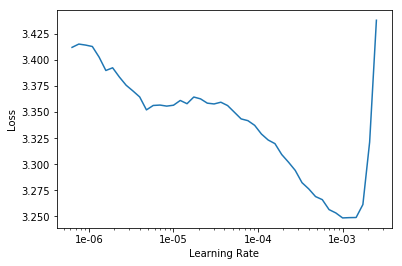

In [15]:
learn.recorder.plot(skip_end=25)

In [13]:
learn.fit_one_cycle(cyc_len=5,
                    max_lr=1e-4,
                    moms=moms_recommended,
                    wd=wd_recommended)

epoch,train_loss,valid_loss,accuracy,time
0,3.428306,3.459201,0.386055,2:50:07
1,3.504095,3.463644,0.386067,2:50:28
2,3.388931,3.429906,0.391202,2:50:19
3,3.302378,3.404495,0.394640,2:50:12
4,3.277035,3.400852,0.395336,2:50:09


In [ ]:
best_perplexity = math.exp(3.400852)
print(f'Best Perplexity so far: {best_perplexity}")

In [15]:
learn.save('tXL_14_epochs_hyp2')

In [16]:
learn=learn.load('tXL_14_epochs_hyp2')

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


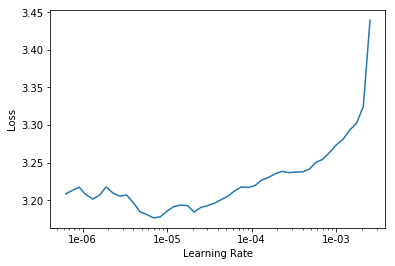

In [20]:
learn.recorder.plot(skip_end=25)

Overfitting attempt:

In [12]:
learn=learn.load('tXL_14_epochs_hyp2')

In [ ]:
learn.fit_one_cycle(cyc_len=3,
                    max_lr=2e-6,
                    moms=moms_recommended,
                    wd=wd_recommended)

epoch,train_loss,valid_loss,accuracy,time


In [14]:
math.exp(3.400852)

29.989640339256745